In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # easy plot

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/netflix-shows/netflix_titles.csv


# EDA

## Import Dataset

In [2]:
df=pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


## Number of Nulls

In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

## Size

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# Remove not related columns

In [6]:
df.drop(["show_id", 'date_added', 'duration', 'director', 'cast'], axis=1, inplace=True)
df.head()

,type,title,country,release_year,rating,listed_in,description
0,TV Show,3%,Brazil,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Mexico,2016,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Singapore,2011,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,United States,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,United States,2008,PG-13,Dramas,A brilliant group of students become card-coun...


# Work on indiv column

**one hot encode list**

In [7]:
def oneHotEncodeList(df, col):
    df[col]=df[col].fillna("0")
    values_list=[]
    for values in df[col]:
        values=values.split(',')
        for value in values:
            if value not in values_list:
                values_list.append(value)
    #print(countries_list)
    for j in values_list:
        df[j]=0
    for i in range(7787):
        values=df[col][i].split(',')
        for value in values:
            df.loc[i, value]=1
    return df, values_list

### type col preprocess

<AxesSubplot:xlabel='type', ylabel='count'>

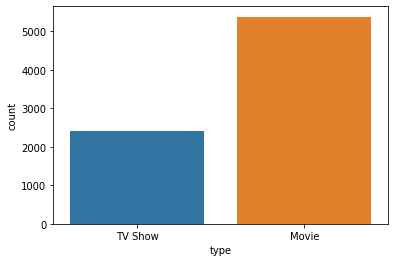

In [8]:
sns.countplot(x='type', data=df)

In [9]:
tv_show_mapping={"TV Show": 0, "Movie": 1}
df["type"]=df["type"].map(tv_show_mapping)
df.head()

,type,title,country,release_year,rating,listed_in,description
0,0,3%,Brazil,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,1,7:19,Mexico,2016,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,1,23:59,Singapore,2011,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,1,9,United States,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,1,21,United States,2008,PG-13,Dramas,A brilliant group of students become card-coun...


### rating col preprocess

<AxesSubplot:xlabel='rating', ylabel='count'>

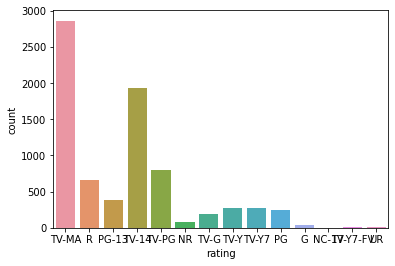

In [10]:
sns.countplot(x='rating', data=df)

In [11]:
df.drop("rating", axis=1, inplace=True)

### listed_in col preprocess

In [12]:
df, genre_list=oneHotEncodeList(df, "listed_in")
df.drop("listed_in", axis=1, inplace=True)
df.head()

,type,title,country,release_year,description,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,Dramas,International Movies,...,Kids' TV,Classic & Cult TV,Romantic TV Shows,Stand-Up Comedy,Cult Movies,Classic & Cult TV,TV Sci-Fi & Fantasy,Romantic Movies,Spanish-Language TV Shows,LGBTQ Movies
0,0,3%,Brazil,2020,In a future where the elite inhabit an island ...,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,7:19,Mexico,2016,After a devastating earthquake hits Mexico Cit...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,23:59,Singapore,2011,"When an army recruit is found dead, his fellow...",0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,9,United States,2009,"In a postapocalyptic world, rag-doll robots hi...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,21,United States,2008,A brilliant group of students become card-coun...,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### country col preprocess

In [13]:
df, country_list=oneHotEncodeList(df, "country")
df.drop("country", axis=1, inplace=True)
df.head()

,type,title,release_year,description,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,Dramas,International Movies,Horror Movies,...,Somalia,Sudan,Panama,Slovenia,Venezuela,Namibia,Uganda,East Germany,Ukraine,Montenegro
0,0,3%,2020,In a future where the elite inhabit an island ...,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,7:19,2016,After a devastating earthquake hits Mexico Cit...,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,23:59,2011,"When an army recruit is found dead, his fellow...",0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,9,2009,"In a postapocalyptic world, rag-doll robots hi...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,21,2008,A brilliant group of students become card-coun...,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### release year col preprocess

<AxesSubplot:xlabel='release_year', ylabel='Count'>

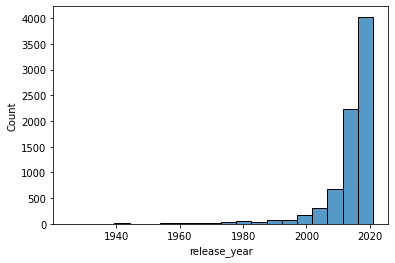

In [14]:
sns.histplot(x="release_year", data=df, bins=20)

In [15]:
df.drop("release_year", axis=1, inplace=True)
df.head()

,type,title,description,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,Dramas,International Movies,Horror Movies,Action & Adventure,...,Somalia,Sudan,Panama,Slovenia,Venezuela,Namibia,Uganda,East Germany,Ukraine,Montenegro
0,0,3%,In a future where the elite inhabit an island ...,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,7:19,After a devastating earthquake hits Mexico Cit...,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,23:59,"When an army recruit is found dead, his fellow...",0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,9,"In a postapocalyptic world, rag-doll robots hi...",0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,21,A brilliant group of students become card-coun...,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### descr preprocess
**download word2vec pretrained model**

In [16]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
!gunzip GoogleNews-vectors-negative300.bin.gz

--2021-06-01 16:56:02--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.168.141
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.168.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  15.3MB/s    in 2m 41s  

2021-06-01 16:58:44 (9.75 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [17]:
import gensim

w2vmodel=gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

In [18]:
from nltk.corpus import stopwords
import string
stop=stopwords.words('english')
def textProcess(col, df):
    df[col]=df[col].apply(lambda x: x.translate(str.maketrans("","", string.punctuation)))
    df[col]=df[col].apply(lambda x: x.lower().split())
    df[col]=df[col].apply(lambda x: [word for word in x if not word in stop])
    return df

df=textProcess("description", df)
df.head()

,type,title,description,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,Dramas,International Movies,Horror Movies,Action & Adventure,...,Somalia,Sudan,Panama,Slovenia,Venezuela,Namibia,Uganda,East Germany,Ukraine,Montenegro
0,0,3%,"[future, elite, inhabit, island, paradise, far...",1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,7:19,"[devastating, earthquake, hits, mexico, city, ...",0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,23:59,"[army, recruit, found, dead, fellow, soldiers,...",0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,9,"[postapocalyptic, world, ragdoll, robots, hide...",0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,21,"[brilliant, group, students, become, cardcount...",0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Recommend (Content Based, Cosine Similarity)

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
def sortTupleListSecond(tup):
    tup.sort(key = lambda x: x[1], reverse=True) 
    return tup 

In [25]:
def descrSim(d1, d2):
    #print(d1)
    #print(d2)
    return w2vmodel.n_similarity(d1, d2)

In [28]:
def recommend_name(show, df, count):
    c=0
    recommendations=[]
    values=df.values
    found=False
    for i in range(7787):
        if (values[i][1]==show):
            i=values[i]
            i[2]=[w for w in i[2] if w2vmodel.has_index_for(w)]
            descr_show=i[2]
            i=np.delete(i, 1)
            i=np.delete(i, 1)
            i=np.array([i])
            #print(i)
            found=True
            break
    if (not found):
        print("NOT FOUND")
        return
    for j in range(7787):
        c+=1
        k=values[j]
        name=k[1]
        k[2]=[w for w in k[2] if w2vmodel.has_index_for(w)]
        descr=k[2]
        if (name==show):
            continue
        k=np.delete(k, 1)
        k=np.delete(k, 1)
        #=[w for w in i if w in wv.key_to_index.keys]
        k=np.array([k])
        #k=k.reshape(-1, 1)
        #print(k)
        score=cosine_similarity(i, k)
        score_descr=descrSim(descr_show, descr)
        score=(score+score_descr)/2
        #print(score)
        recommendations.append((name, score))
        #print(name, score)
        if (c>=count):
            #print(recommendations)
            sortTupleListSecond(recommendations)
            return recommendations

In [29]:
recommedations=recommend_name("Death Note", df, 7787)
for i in recommedations:
    print(i)

('The Devil Inside', array([[0.82879829]]))
('The Basement', array([[0.82035252]]))
('The Craft', array([[0.81535083]]))
('The Witch Files', array([[0.8139424]]))
('Incarnate', array([[0.81267715]]))
('The Darkness', array([[0.81202808]]))
('The Vatican Tapes', array([[0.79298162]]))
("Gerald's Game", array([[0.78787899]]))
('Paranormal Activity', array([[0.78166664]]))
('Before I Wake', array([[0.77919707]]))
('Delirium', array([[0.77667433]]))
('Hush', array([[0.7756654]]))
('The Haunting of Molly Hartley', array([[0.773056]]))
('Shelter', array([[0.77256358]]))
('The Detained', array([[0.77253678]]))
('The Ring', array([[0.76970759]]))
('13 Sins', array([[0.76804695]]))
('All Light Will End', array([[0.76628056]]))
('Cam', array([[0.76602915]]))
('The Conjuring', array([[0.76136249]]))
('What Lies Beneath', array([[0.76011688]]))
('Chernobyl Diaries', array([[0.75942332]]))
('Desolation', array([[0.75827786]]))
('The Charnel House', array([[0.75716162]]))
('The Vault', array([[0.755